<a href="https://colab.research.google.com/github/umamahesh745/ShadowFox/blob/main/Boston_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HousingData.csv to HousingData (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
reg = LinearRegression()

In [ ]:
X = df.iloc[:, :-1]  # All rows, all columns except the last
y = df.iloc[:, -1]

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred)

20.9834745031118

In [ ]:
test_data = [[
    0.02729,   # CRIM
    0.0,       # ZN
    7.07,      # INDUS
    0.0,       # CHAS
    0.469,     # NOX
    7.185,     # RM
    61.1,      # AGE
    4.9671,    # DIS
    2,         # RAD
    242,       # TAX
    17.8,      # PTRATIO
    392.83,    # B
    4.03       # LSTAT
]]

In [ ]:
reg.predict(test_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.73308696])

In [ ]:
import matplotlib.pyplot as plt

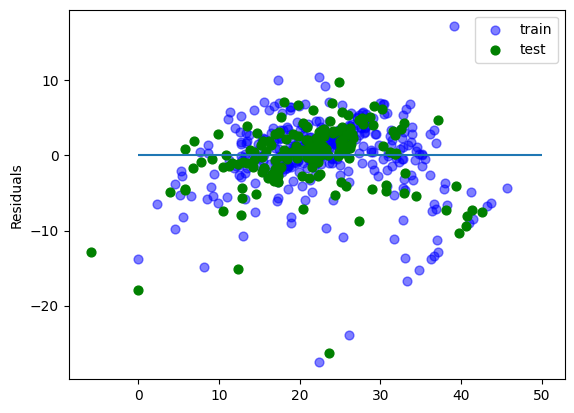

In [ ]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, c='b', s=40, alpha=0.5, label="train")
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, c='g', s=40, label="test")
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.ylabel('Residuals')
plt.legend()